In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/projecet/en_a.tsv
/kaggle/input/projecet/test.tsv
/kaggle/input/projecet/intertass_test.xml
/kaggle/input/projecet/hateEval_train.csv
/kaggle/input/projecet/dev.tsv
/kaggle/input/projecet/dev_en.tsv
/kaggle/input/projecet/emoevent_es.csv
/kaggle/input/projecet/train.tsv
/kaggle/input/projecet/emoevent_test.tsv
/kaggle/input/projecet/intertass_train.xml
/kaggle/input/projecet/intertass_train.csv
/kaggle/input/projecet/emoevent_dev.tsv
/kaggle/input/projecet/sarcasm-dataset.txt
/kaggle/input/projecet/intertass_test.csv
/kaggle/input/projecet/emoevent_train.tsv
/kaggle/input/projecet/dev_es.tsv
/kaggle/input/projecet/test_en.tsv
/kaggle/input/projecet/hateEval_test.csv
/kaggle/input/projecet/train_en.tsv
/kaggle/input/projecet/intertass_dev.csv
/kaggle/input/projecet/intertass_dev.xml
/kaggle/input/trailhate/trial_en.tsv
/kaggle/input/emotion/hateSpeechEmotion.pth
/kaggle/input/englishmtl/__results__.html
/kaggle/input/englishmtl/__resultx__.html
/kaggle/input/englishmtl/__n

In [2]:
!pip install pandas
!pip install emoji
import pandas as pd

In [3]:
#PRE PROCESSING

import re
import emoji
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def pre_process(text):

    text = text.replace('\n', '')
    text = text.replace('\t', '')
    text = text.replace('\s', '')
    text = re.sub(r'https?://\S+|www\.\S+', 'url', text) # to remove url
    text = re.sub(r'\S+@\S+', 'email', text) # to remove email
    text = re.sub(r'@\S+', 'user', text) # to remove user
    text = re.sub(r'\d+%', 'percentage', text) # to remove percentange
    text = re.sub(r'\$\d+(\.\d+)?', 'money', text) # to remove money
    text = re.sub(r'\d+/\d+/\d+', 'date', text) # to remove dates
    text = re.sub(r'\d+:\d+', 'time', text) # to put time in the place of time
    text = re.sub(r'\d{3}-\d{3}-\d{4}', 'phone', text) # phone number
    text = re.sub(r'#(\S+)', lambda x: ' '.join(re.findall(r'[A-Z]?[a-z]+', x.group())), text)# to remove hashtags
    text = re.sub(r'\b(\w+?)\1{2,}\b', r'\1', text) # to remove elongated words
    text = emoji.demojize(text) # to remove emojies
    text = text.lower() # to convert into lower case

    stop_words = set(stopwords.words('english'))
    words = text.split(" ")
    final_words = [word for word in words if word not in stop_words]
    final_sen = ' '.join(final_words)

    return final_sen

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
DATASET_COLUMNS = ["id", "entity", "sentiment", "tweet"]

hateEvalP_train = pd.read_csv('/kaggle/input/projecet/train_en.tsv', delimiter='\t')
hateTrail_train = pd.read_csv('/kaggle/input/trailhate/trial_en.tsv', delimiter='\t')
hateEval_train = pd.concat([hateEvalP_train, hateTrail_train], axis = 0, ignore_index=True)

hateEval_dev = pd.read_csv('/kaggle/input/projecet/dev_en.tsv', delimiter='\t')

senti_train = pd.read_csv('/kaggle/input/projecet/train.tsv', delimiter='\t')
senti_dev = pd.read_csv('/kaggle/input/projecet/dev.tsv', delimiter='\t')
senti_test = pd.read_csv('/kaggle/input/projecet/test.tsv', delimiter='\t')

print(hateEval_train)
print(hateEval_train['HS'].value_counts().get(1, 0))
print(hateEval_train['HS'].value_counts().get(0, 0))

       id                                               text  HS  TR  AG
0     201  Hurray, saving us $$$ in so many ways @potus @...   1   0   0
1     202  Why would young fighting age men be the vast m...   1   0   0
2     203  @KamalaHarris Illegals Dump their Kids at the ...   1   0   0
3     204  NY Times: 'Nearly All White' States Pose 'an A...   0   0   0
4     205  Orban in Brussels: European leaders are ignori...   0   0   0
...   ...                                                ...  ..  ..  ..
9095   96  Russia has said that within the coming months,...   0   0   0
9096   97  Orthodox Church attacked in hate crime against...   0   0   0
9097   98  UK MPs probe unpublished UN â€˜sex-for-foodâ€™...   0   0   0
9098   99  \"Large areas have been evacuated and people w...   0   0   0
9099  100  what a f**king political muppet. https://t.co/...   0   0   0

[9100 rows x 5 columns]
3833
5267


In [5]:
print(hateEval_train)

       id                                               text  HS  TR  AG
0     201  Hurray, saving us $$$ in so many ways @potus @...   1   0   0
1     202  Why would young fighting age men be the vast m...   1   0   0
2     203  @KamalaHarris Illegals Dump their Kids at the ...   1   0   0
3     204  NY Times: 'Nearly All White' States Pose 'an A...   0   0   0
4     205  Orban in Brussels: European leaders are ignori...   0   0   0
...   ...                                                ...  ..  ..  ..
9095   96  Russia has said that within the coming months,...   0   0   0
9096   97  Orthodox Church attacked in hate crime against...   0   0   0
9097   98  UK MPs probe unpublished UN â€˜sex-for-foodâ€™...   0   0   0
9098   99  \"Large areas have been evacuated and people w...   0   0   0
9099  100  what a f**king political muppet. https://t.co/...   0   0   0

[9100 rows x 5 columns]


In [6]:
print(len(hateEval_train))
print(len(senti_train))


print(len(hateEval_dev))
print(len(senti_dev))

9100
5112
1000
744


In [7]:
print(hateEval_train.columns)
print(senti_train.columns)

Index(['id', 'text', 'HS', 'TR', 'AG'], dtype='object')
Index(['id', 'event', 'tweet', 'offensive', 'emotion'], dtype='object')


In [5]:
hateEval_train['pre_process'] = hateEval_train['text'].apply(pre_process)
senti_train['pre_process'] = senti_train['tweet'].apply(pre_process)

In [9]:
hateEval_train['pre_process'][0]

'hurray, saving us $$$ many ways user user lock build wall end boycott boycott nike'

In [10]:

print(senti_train['emotion'].unique())
print(hateEval_train['HS'].unique())

['others' 'disgust' 'joy' 'anger' 'sadness' 'surprise' 'fear']
[1 0]


In [24]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

print(model)
print(tokenizer)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [20]:
import torch.nn as nn
import torch
import torch.optim as optim
senToNo_emoevent = {'others':0, 'sadness':1, 'joy':2, 'anger':3, 'surprise':4, 'disgust':5, 'fear':6}

In [21]:
from torch.utils.data import Dataset, DataLoader

BatchSize = 8
class MultiTaskData(Dataset):
    def __init__(self, tweets, labels, no, dic):
        self.tweets = tweets
        self.labels = labels
        self.no = no
        self.sentiToLabel = dic
    
    def __len__(self):
        return len(self.tweets)
    
    def __getitem__(self, ind):
        output = tokenizer(self.tweets[ind],  max_length = 80,  padding='max_length', truncation=True, return_tensors='pt')
        input_ids = output['input_ids'][0]
        attention_mask = output['attention_mask'][0]
        
        if self.no == 1: #polarity
            my_tensor = torch.zeros(3)
            my_tensor[self.labels[ind]] = 1
        elif self.no == 2: #sentiment
            my_tensor = torch.zeros(7)
            my_tensor[self.sentiToLabel[self.labels[ind]]] = 1
        else: #hate [ 0 : NothateSpeeh, 1 : hateSpeech] ==> [ 0 : hateSpeech, 1 : not a hateSpeech]
            my_tensor = torch.zeros(2)
            my_tensor[self.labels[ind]] = 1
        
        return input_ids, attention_mask, my_tensor, self.tweets[ind]
            
            
hateEval_data = MultiTaskData(hateEval_train['pre_process'], hateEval_train['HS'], 3, None)
senti_data = MultiTaskData(senti_train['pre_process'],senti_train['emotion'], 2, senToNo_emoevent)

In [14]:
hateEval_train['pre_process'][2]

'user illegals dump kids border like road kill refuse unite! hope get amnesty, free education welfare illegal familes belong together country taxpayer dime scam amnesty send'

In [22]:
hateEval_load = DataLoader(hateEval_data, BatchSize)
senti_load = DataLoader(senti_data, BatchSize)

print(len(hateEval_load))
print(len(senti_load))

1138
639


In [16]:
print(hateEval_data[0])
print(senti_data[0])

(tensor([  101, 15876, 11335,  2100,  1010,  7494,  2149,  1002,  1002,  1002,
         2116,  3971,  5310,  5310,  5843,  3857,  2813,  2203, 17757, 17757,
        18368,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), tensor([0., 1.]), 'hurray, saving us $$$ many ways user user lock build wall end boycott boycott ni

In [25]:
class MultiTaskModel(nn.Module):
    def __init__(self, hidden_dim, d_model, output1, output2, output3, drop_prob = 0.1):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()        
        
        self.linear21 = nn.Linear(d_model, hidden_dim)
        self.dropout21 = nn.Dropout(drop_prob)
        self.linear22 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout22 = nn.Dropout(drop_prob)
        self.linear23 = nn.Linear(hidden_dim, output2)
        
        
        self.linear31 = nn.Linear(d_model, hidden_dim)
        self.dropout31 = nn.Dropout(drop_prob)
        self.linear32 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout32 = nn.Dropout(drop_prob)
        self.linear33 = nn.Linear(hidden_dim, output3)
        
    
    def forward(self, input_ids, masks, task_no):
        
        output = self.bert(input_ids, masks) #[32, 80, 768]
        output = output['last_hidden_state']
        cls = output[:,0,:] # [32 x 768]
        
        if task_no[1] == 1:
            y = self.linear21(cls)
            y = self.relu(y)
            y = self.dropout21(y)
            y = self.linear22(y)
            y = self.relu(y)
            y = self.dropout22(y)
            y = self.linear23(y)
        
        else:
            y = self.linear31(cls)
            y = self.relu(y)
            y = self.dropout31(y)
            y = self.linear32(y)
            y = self.relu(y)
            y = self.dropout32(y)
            y = self.linear33(y)
            
        
        return y

 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskModel(200, 768, 3, 7, 2)
model = model.to(device)
cross_criterion = nn.CrossEntropyLoss()
bce_criterion = nn.BCELoss()


optimizer_sentiment =  optim.AdamW([
                                    {'params' : model.bert.parameters()},
                                    {'params' : model.linear21.parameters()},
                                    {'params' : model.dropout21.parameters()},
                                    {'params' : model.linear22.parameters()},
                                    {'params' : model.dropout22.parameters()},
                                    {'params' : model.linear23.parameters()},
                       
                                  ],  lr=1e-4, weight_decay=0.01
                                )

optimizer_hate = optim.AdamW([
                                    {'params' : model.bert.parameters()},
                                    {'params' : model.linear31.parameters()},
                                    {'params' : model.dropout31.parameters()},
                                    {'params' : model.linear32.parameters()},
                                    {'params' : model.dropout32.parameters()},
                                    {'params' : model.linear33.parameters()},
                       
                                  ],  lr=1e-4, weight_decay=0.01
                                )


In [18]:
def getData(data, i):
    if i >= len(data):
        return None, None, None
    
    for j, (input_ids, mask, labels, tweet) in enumerate(data):
        if i == j:
            return input_ids, mask, labels, tweet
    
    return None, None, None

In [19]:
data = list(hateEval_dev['text'])
label = list(hateEval_dev['HS'])
dev_data = []
dev_label = []
for i, x in enumerate(data):
    if len(dev_data) > 32:
        break
    elif isinstance(x, str):
        dev_data.append(pre_process(x))
        dev_label.append(label[i])
    
hateEval_dev_dataset = MultiTaskData(dev_data, dev_label, 3, None)
hateEval_dev_load = DataLoader(hateEval_dev_dataset, len(dev_data))

In [8]:
!pip install torcheval-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.3/192.3 kB 3.8 MB/s eta 0:00:00a 0:00:01


In [10]:
import torcheval
from torcheval.metrics.functional import multiclass_confusion_matrix

# polarity_accuracy = torcheval.metrics.MulticlassAccuracy(num_classes = 3, device = device)
# polarity_f1Score = torcheval.metrics.MulticlassF1Score(num_classes = 3, device = device)
# polarity_confusion_matrix = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 3, device = device)

# hate_accuracy = torcheval.metrics.MulticlassAccuracy(num_classes = 2 , device = device)
# hate_f1Score = torcheval.metrics.MulticlassF1Score(num_classes = 2, device = device)
# hate_confusion_matrix = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2, device = device)

# sentiment_accuracy = torcheval.metrics.MulticlassAccuracy(num_classes = 7, device = device)
# sentiment_f1Score = torcheval.metrics.MulticlassF1Score(num_classes = 7, device = device)
# sentiment_confusion_matrix = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 7, device = device)

# hate_accuracy_dev = torcheval.metrics.MulticlassAccuracy(num_classes = 2 , device = device)
# hate_f1Score_dev = torcheval.metrics.MulticlassF1Score(num_classes = 2, device = device)
# hate_confusion_matrix_dev = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2, device = device)

upper_limit = 256 # 175 -- 32 size
EPOCHS = 7
threshold = 0.5 
lossPerEpoch = []
falsePositive = []  #0->1
falseNegative =[]   #1->0



# for i in range(EPOCHS):
#     lossList = []
#     for j in range(upper_limit):
        
#         if i < 4:
#             for param in model.bert.parameters():
#                 param.requires_grad = False
#         elif i == 2:
#             for param in model.bert.parameters():
#                 param.requires_grad = True
            
            
#         model.train()
#         loss = 0
   
#         input_ids, masks, label, tweets = getData(senti_load, j)
#         task_no = torch.zeros(3)
#         task_no[1] = 1
#         if input_ids != None:
            
#             input_ids, masks, task_no = input_ids.to(device), masks.to(device), task_no.to(device)
#             output = model.forward(input_ids, masks, task_no)
#             predictions = torch.argmax(output, dim=1)
#             label_ground = label.squeeze().int()
#             predictions, label_ground, output, label = predictions.to(device), label_ground.to(device), output.to(device), label.to(device)
            
#             loss = cross_criterion(output, label)
#             print(loss, 1)
#             optimizer_sentiment.zero_grad()
#             loss.backward()
#             optimizer_sentiment.step()
        
#         input_ids, masks, label, tweets = getData(hateEval_load, j)
#         task_no = torch.zeros(3)
#         task_no[2] = 1
#         if input_ids != None:
            
#             input_ids, masks, task_no = input_ids.to(device), masks.to(device), task_no.to(device)
#             output = model.forward(input_ids, masks, task_no)
#             predictions = torch.argmax(output, dim=1)
#             label_ground = torch.argmax(label, dim=1)
#             print(predictions, label_ground)
#             output, label = output.to(device), label.to(device)

#             predictions, label_ground = predictions.to(device), label_ground.to(device)
#             hate_accuracy.update(predictions, label_ground)
#             hate_f1Score.update(predictions, label_ground)
#             hate_confusion_matrix.update(predictions, label_ground)
            
#             for i in range(8):
#                 if predictions[i] == 1 and label_ground[i] == 0:
#                     falsePositive.append(tweets[i])
#                 elif predictions[i] == 0 and label_ground[i] == 1:
#                     falseNegative.append(tweeets[i])
                    
                    
            
#             loss = cross_criterion(output, label)
#             lossList.append(loss)
#             print(loss, 2)
#             optimizer_hate.zero_grad()
#             loss.backward()
#             optimizer_hate.step()
            
        
#     accuracy = hate_accuracy.compute()
#     f1_score = hate_f1Score.compute()
#     confusion_matrix = hate_confusion_matrix.compute()
        

#     model.eval()
#     eval_loss = 0
    
#     task_no = torch.zeros(3)
#     task_no[2] = 1
#     for input_ids, masks, labels in hateEval_dev_load:
            
#         input_ids, masks, task_no = input_ids.to(device), masks.to(device), task_no.to(device)
#         output = model.forward(input_ids, masks, task_no)
#         predictions = torch.argmax(output, dim=1)
#         label_ground = torch.argmax(labels, dim=1)
#         print(predictions, label_ground)
#         output, label = output.to(device), labels.to(device)
            
#         predictions, label_ground = predictions.to(device), label_ground.to(device)
#         eval_loss += cross_criterion(output, label)
#         hate_accuracy_dev.update(predictions, label_ground)
#         hate_f1Score_dev.update(predictions, label_ground)
#         hate_confusion_matrix_dev.update(predictions, label_ground)
    
#     accuracy_dev = hate_accuracy_dev.compute()
#     f1_score_dev = hate_f1Score_dev.compute()
#     confusion_matrix_dev =  hate_confusion_matrix_dev.compute()
    
#     hate_accuracy.reset()
#     hate_f1Score.reset()
#     hate_confusion_matrix.reset()
    
#     hate_accuracy_dev.reset()
#     hate_f1Score_dev.reset()
#     hate_confusion_matrix_dev.reset()
#     lossPerEpoch.append(sum(lossList)/len(lossList))
        
#     print(i, eval_loss, loss)
#     print(accuracy, f1_score, confusion_matrix)
#     print(accuracy_dev, f1_score_dev, confusion_matrix_dev)
        
        

In [26]:
hateEval_test = pd.read_csv('/kaggle/input/projecet/test_en.tsv', delimiter='\t')
hateEval_labels = pd.read_csv('/kaggle/input/projecet/en_a.tsv', delimiter='\t', header=None)
hateEval_test['pre_process'] = hateEval_test['text'].apply(pre_process)
hateEval_data = MultiTaskData(hateEval_test['pre_process'], hateEval_labels[1], 3, None)
hateEval_test_load = DataLoader(hateEval_data, 8)

In [27]:
hate_accuracy_test = torcheval.metrics.MulticlassAccuracy(num_classes = 2 )
hate_f1Score_test = torcheval.metrics.MulticlassF1Score(num_classes = 2)
hate_confusion_matrix_test = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2)

In [28]:
task_no = torch.zeros(3)
task_no[2] = 1
# task_no = task_no.to(device)
falsePositive = []
falseNegative = []

for j, (input_ids, masks, labels, tweets) in enumerate(hateEval_test_load):
        tweet = tweets
        input_ids, masks = input_ids.to(device), masks.to(device)
        output = model.forward(input_ids, masks, task_no)
        predictions = torch.argmax(output, dim=1)
        label_ground = torch.argmax(labels, dim=1)
        print(predictions, label_ground)
        output, label = output.to(device), labels.to(device)
            
        predictions, label_ground = predictions.to(device), label_ground.to(device)
        hate_accuracy_test.update(predictions, label_ground)
        hate_f1Score_test.update(predictions, label_ground)
        hate_confusion_matrix_test.update(predictions, label_ground)
        
        for i in range(8):
            if predictions[i] == 1 and label_ground[i] == 0:
                falsePositive.append(tweet[i])
            elif predictions[i] == 0 and label_ground[i] == 1:
                falseNegative.append(tweet[i])
        
# accuracy_test = hate_accuracy_test.compute()
# f1_score_test = hate_f1Score_test.compute()
# confusion_matrix_test =  hate_confusion_matrix_test.compute()
    
# hate_accuracy_test.reset()
# hate_f1Score_test.reset()
# hate_confusion_matrix_test.reset()
   
print(accuracy_test, f1_score_test, confusion_matrix_test)

tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 1, 1, 1, 1, 1, 0, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 1, 1, 0, 0, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 1, 1, 1, 0, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 1, 1, 0, 1, 1, 1, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([0, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 0, 0, 1, 1, 0, 1, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([0, 1, 1, 1, 1, 0, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 1, 1, 1, 1, 1, 1, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 0, 1, 1, 1, 1, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([0, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 0, 1, 0, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([1, 1, 1, 1, 1, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0]) tensor([0, 0, 1, 1, 1, 0, 0, 1])
tensor([0,

NameError: name 'accuracy_test' is not defined

In [14]:
import torch

# filepath = '/kaggle/working/hateSpeechEmotion.pth'

# torch.save(model, filepath)

In [26]:
model_load = torch.load(filepath)
print(model_load)

MultiTaskModel(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [27]:
!pip install IPython


In [28]:
from IPython.display import FileLink
FileLink('hateSpeechEmotion.pth')

/kaggle/working/hateSpeechEmotion.pth

In [29]:
!pip install gradio

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 91.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=186e18efd281c9d17c0ca954d9e8b8b06e779f5112dbf696569e49fb2e5ac498
  Stored in directory: /root/.cache/pip/wheels/bd/65/9a/671fc6dcde07d4418df0c592f8df512b26d7a0029c2a23dd81
Successfully built ffmpy
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0
  Attempting uninst

In [30]:
import gradio as gr

In [31]:
import gradio as gr
import torch
import torch.nn.functional as F
import numpy as np
from transformers import BertTokenizer, BertModel


model = torch.load("/kaggle/working/hateSpeechEmotion.pth", map_location=torch.device('cpu'))
model.eval()


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


def preprocess(text):

    inputs = tokenizer(text, max_length = 80,  padding='max_length', truncation=True, return_tensors='pt' )
    return inputs['input_ids'], inputs['attention_mask']

# Define the model prediction function
def predict(text):
    input_ids, attention_mask = preprocess(text)
    
    with torch.no_grad():
        output = model(input_ids, attention_mask)
        prediction = torch.argmax(output, dim=1)
    return "Hate Speech" if prediction == 1 else "Not Hate Speech"



# Create Gradio interface
iface = gr.Interface(fn=predict, inputs="text", outputs="text", title="Hate Speech Detector")

# Launch the Gradio interface
iface.launch()



Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on public URL: https://7cfabbba9d25387108.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


tensor([1, 2, 3, 4, 5, 6, 7])


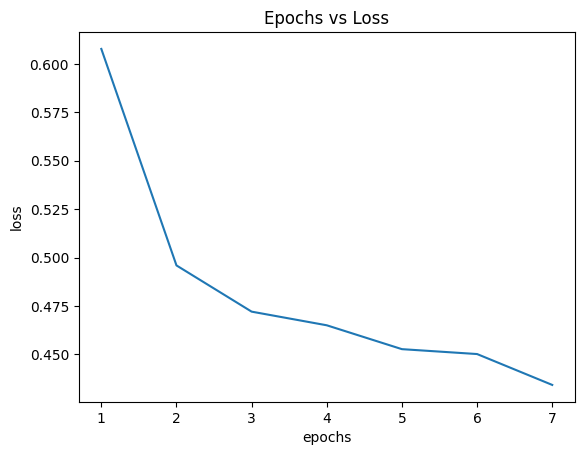

In [32]:
import matplotlib.pyplot as plt
lossItems = list()
for loss in lossPerEpoch:
    lossItems.append(loss.item())
lossItems = torch.tensor(lossItems)
epochs = torch.arange(len(lossItems))+1
print(epochs)
plt.plot(epochs,lossItems)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xticks(range(1, len(lossItems) + 1))
plt.title('Epochs vs Loss')
plt.show()

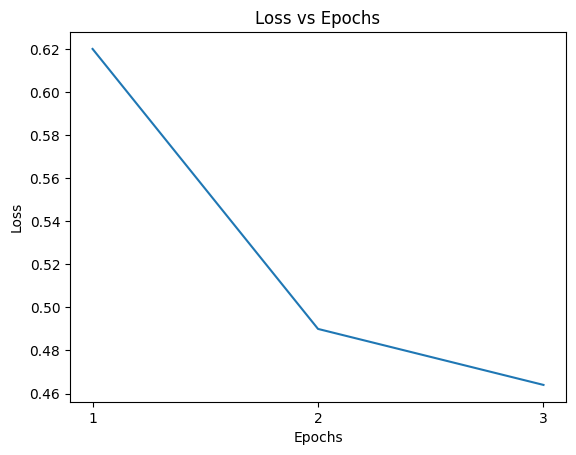

In [3]:
import matplotlib.pyplot as plt

# Given data
lossItems = [0.620, 0.49, 0.464]
epochs = [1, 2, 3]

# Plot
plt.plot(epochs, lossItems)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(lossItems) + 1))
plt.title('Loss vs Epochs')
plt.show()


In [23]:
model = torch.load("/kaggle/input/emotion/hateSpeechEmotion.pth", map_location=torch.device('cpu'))
model.eval()

MultiTaskModel(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af